# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Dafi Hisbullah
- **Email:** dafimuhammad1@gmail.com
- **ID Dicoding:** mysties

## Menentukan Pertanyaan Bisnis

- Apa faktor lingkungan dan musiman utama yang memengaruhi pola penyewaan sepeda?
- Bagaimana event dan hari libur mempengaruhi penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

## Data Wrangling

### Gathering Data

In [12]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
day_path = f'/content/drive/MyDrive/datasets/Bike-sharing-dataset/day.csv'
hour_path = f'/content/drive/MyDrive/datasets/Bike-sharing-dataset/hour.csv'

df_day = pd.read_csv(day_path)
df_hour = pd.read_csv(hour_path)

**Insight:**
- Dataset yang digunakan adalah dataset dari persewaan sepeda modern yang memiliki fitur membership sehingga penyewa dapat melakukan pinjaman secara otomatis.
- Dataset yang akan digunakan adalah dataset berdasarkan hari dan jam.

### Assessing Data

In [14]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [17]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [18]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [19]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [20]:
df_day['season'].value_counts()

,count
season,
3,188
2,184
1,181
4,178


In [21]:
df_day['weathersit'].value_counts()

,count
weathersit,
1,463
2,247
3,21


In [22]:
df_hour['weathersit'].value_counts()

,count
weathersit,
1,11413
2,4544
3,1419
4,3


In [23]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [24]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [25]:
df_day['instant'].duplicated().sum()

0

In [26]:
df_hour['instant'].duplicated().sum()

0

**Insight:**
- Berdasarkan assessment diatas, tidak ada data yang hilang ataupun data yang terduplikat.
- Kolom dteday yang masih berformat object harus diubah menjati format datetime.

### Cleaning Data

In [27]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

**Insight:**
- Berhubung data yang diberikan sudah matang dan tidak banyak yang perlu dibersihkan, maka saya tidak menambahkan banyak data processing.
- Hanya perlu mengubah tipe data menjadi datetime agar lebih mudah saat explorasi.

## Exploratory Data Analysis (EDA)

### Explore ...

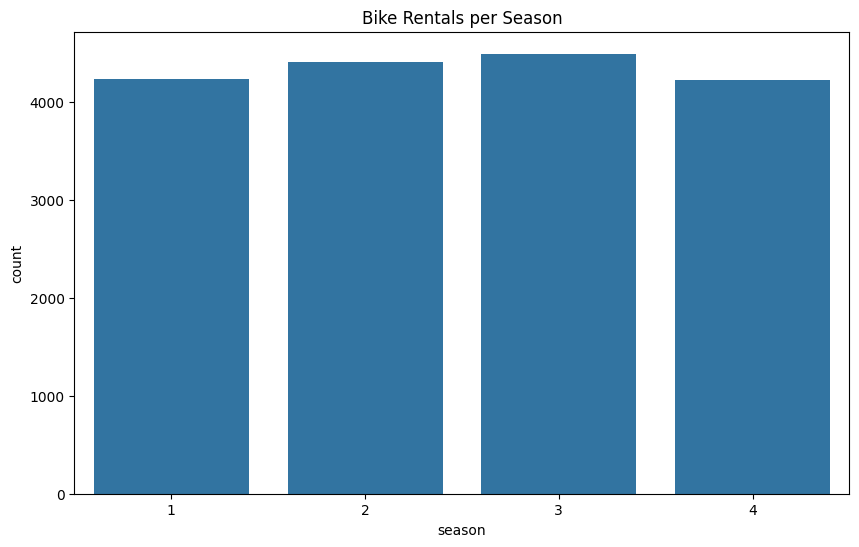

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=df_hour)
plt.title('Bike Rentals per Season')
plt.show()

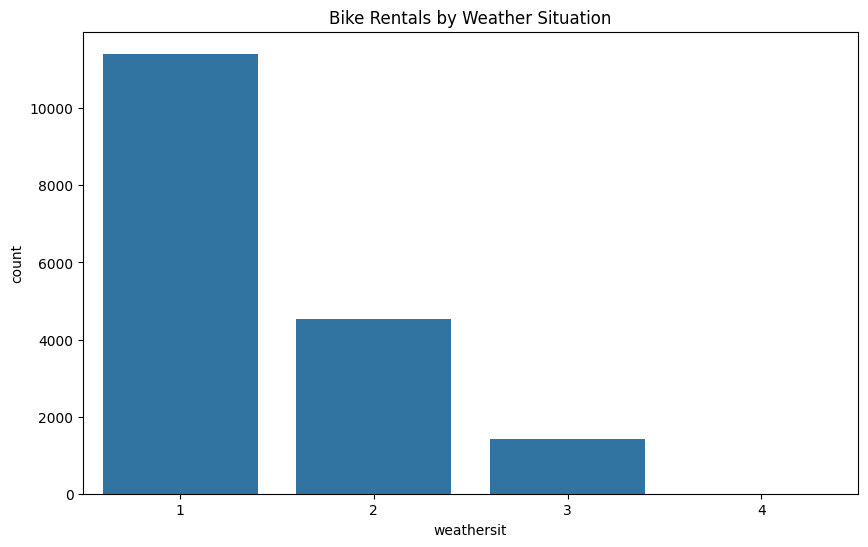

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='weathersit', data=df_hour)
plt.title('Bike Rentals by Weather Situation')
plt.show()

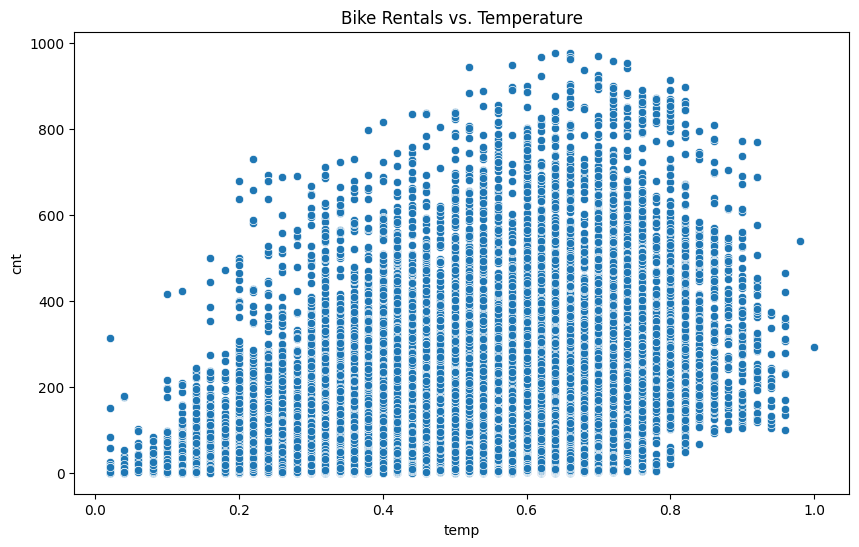

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df_hour)
plt.title('Bike Rentals vs. Temperature')
plt.show()

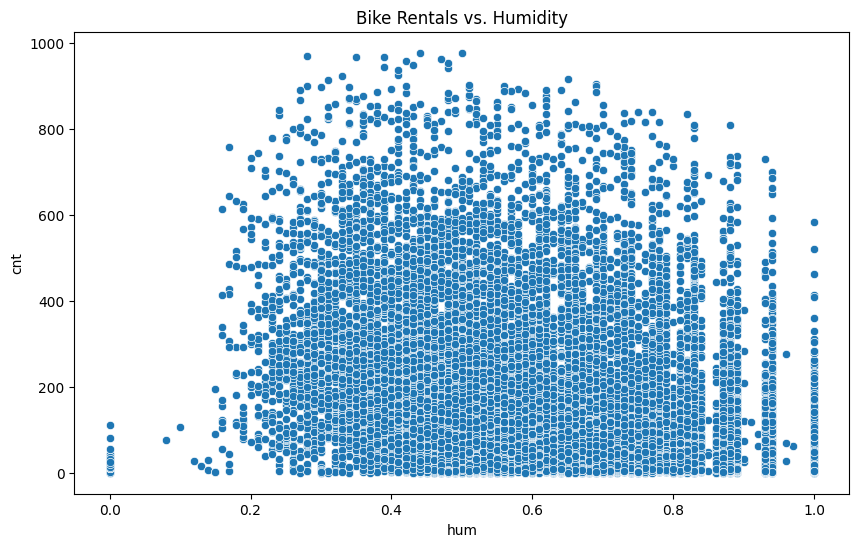

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=df_hour)
plt.title('Bike Rentals vs. Humidity')
plt.show()

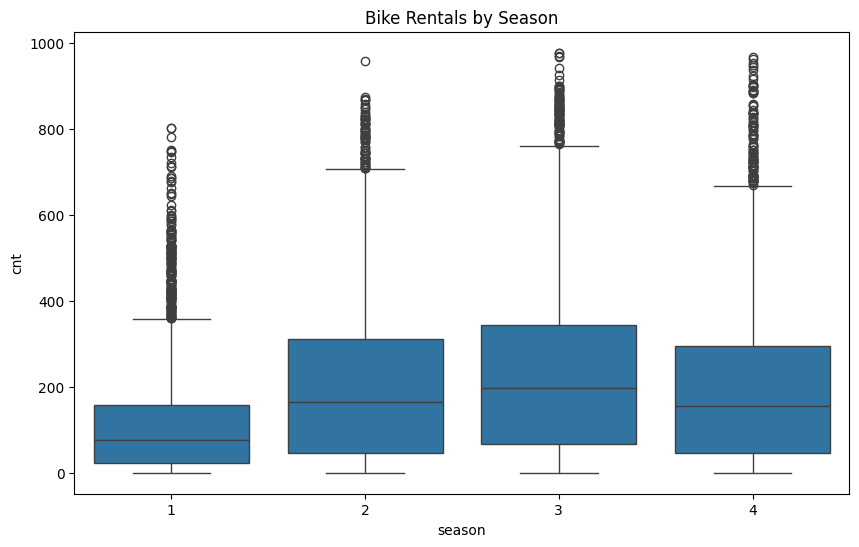

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df_hour)
plt.title('Bike Rentals by Season')
plt.show()

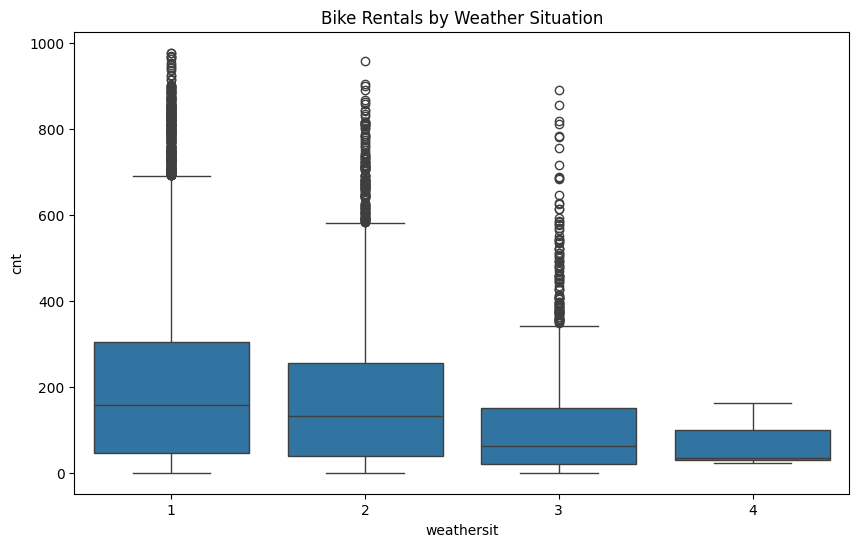

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_hour)
plt.title('Bike Rentals by Weather Situation')
plt.show()

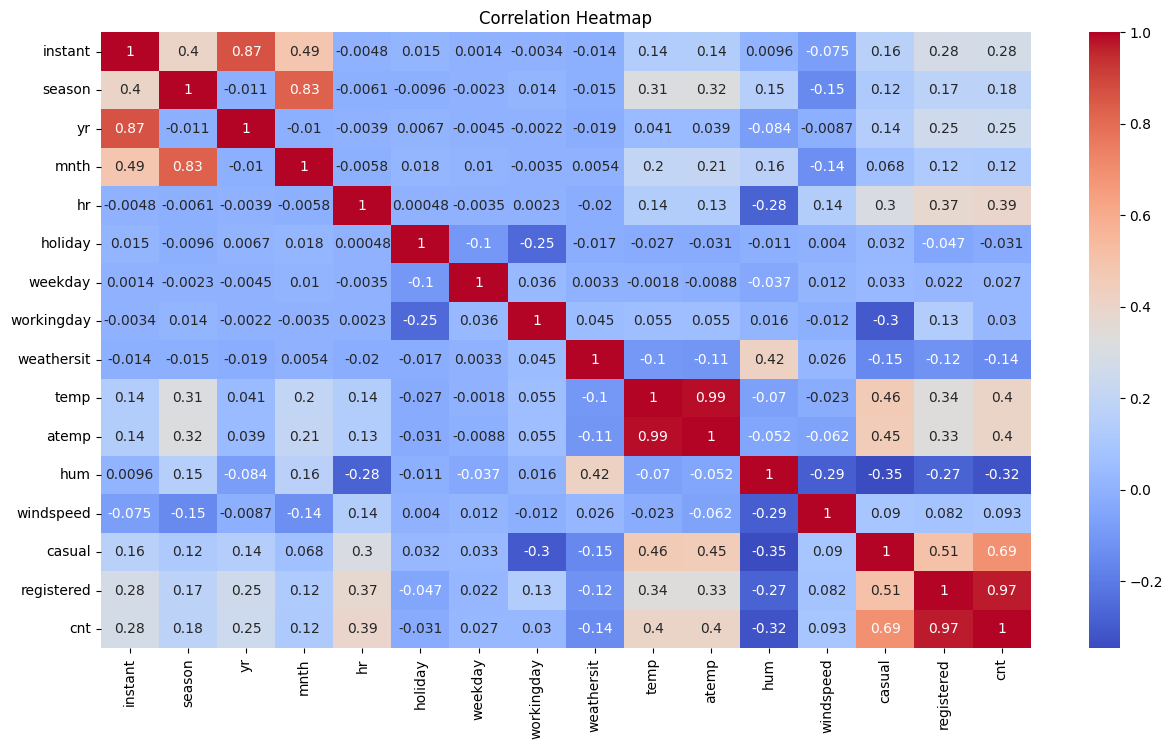

In [34]:
plt.figure(figsize=(15, 8))
corr_matrix = df_hour.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

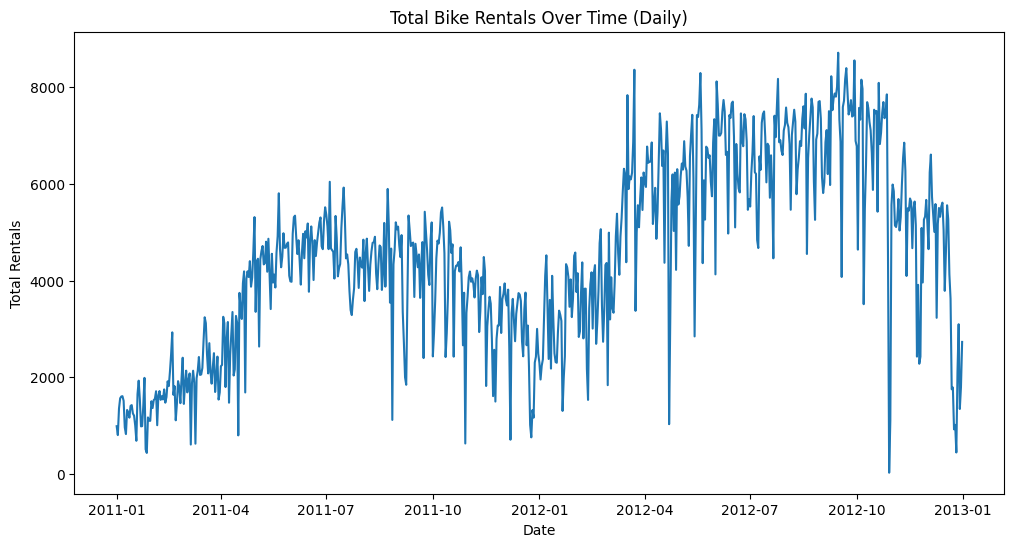

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df_day['dteday'], df_day['cnt'])
plt.title('Total Bike Rentals Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.show()

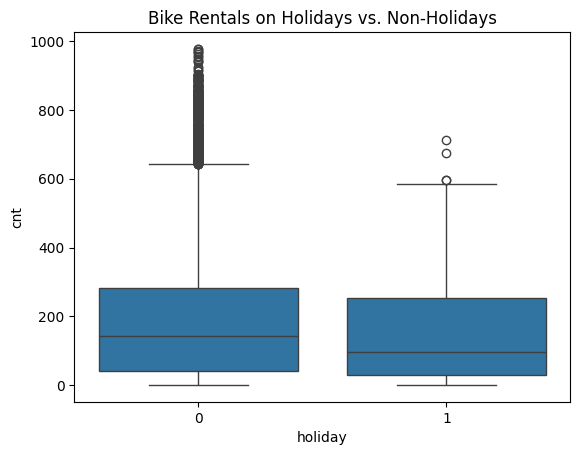

In [36]:
sns.boxplot(x='holiday', y='cnt', data=df_hour)
plt.title('Bike Rentals on Holidays vs. Non-Holidays')
plt.show()

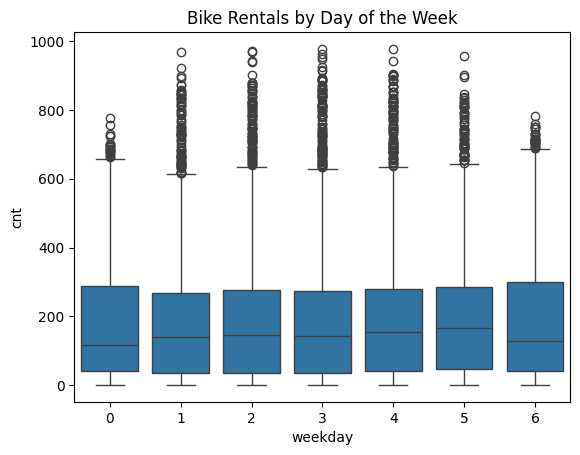

In [37]:
sns.boxplot(x='weekday', y='cnt', data=df_hour)
plt.title('Bike Rentals by Day of the Week')
plt.show()

**Insight:**
- Analisis pada time-series menunjukan penyewa lebih banyak pada jam kerja (pagi dan sore) saat weekdays, sedangkan saat hari libur lebih banyak penyewa saat siang hari.
- Bokplot menunjukan penyewa lebih banyak saat hari kerja daripada hari libur. Ini menunjukan sepeda lebih dibutuhkan untuk saat bekerja daripada untuk tujuan rekreasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor lingkungan dan musiman utama yang memengaruhi pola penyewaan sepeda?

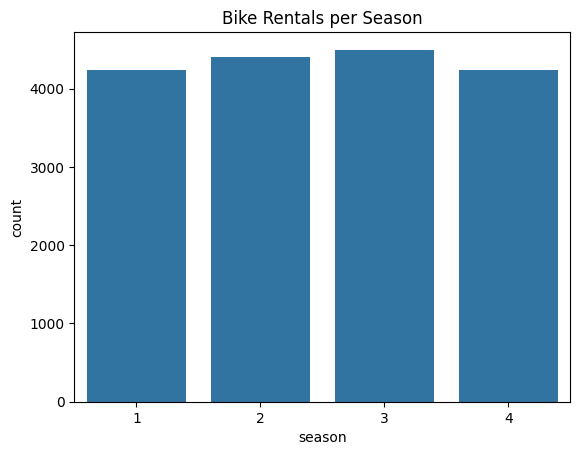

In [38]:
sns.countplot(x='season', data=df_hour)
plt.title('Bike Rentals per Season')
plt.show()

Winter (Season 1) memiliki penyewa yang lebih sedikit dibanding season lain, sedangkan Summer (Season 3) dan Fall (Season 4) memiliki penyewa lebih banyak.
Graph tersebut menunjukan efek dari berubahan musim, dengan jumlah penyewa akan naik ketika musim bersuhu hangat.

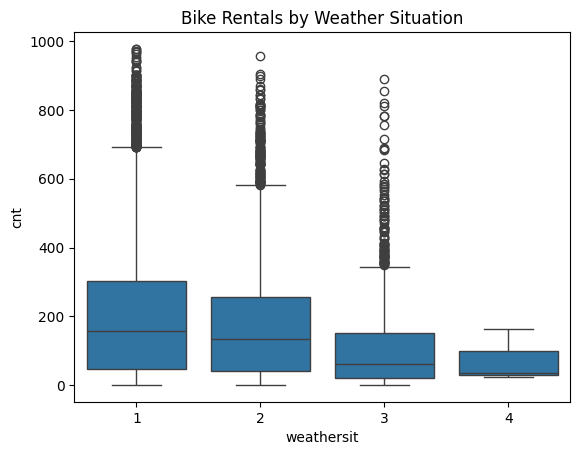

In [39]:
sns.boxplot(x='weathersit', y='cnt', data=df_hour)
plt.title('Bike Rentals by Weather Situation')
plt.show()

jumlah penyewa akan sedikit menurun ketika cuaca memburuk (Weather Situation 3 dan 4). Graph tersebut menunjukan cuaca yang cerah dan sedikit berawan akan meningkatkan jumlah penyewa (Weather Situation 1).

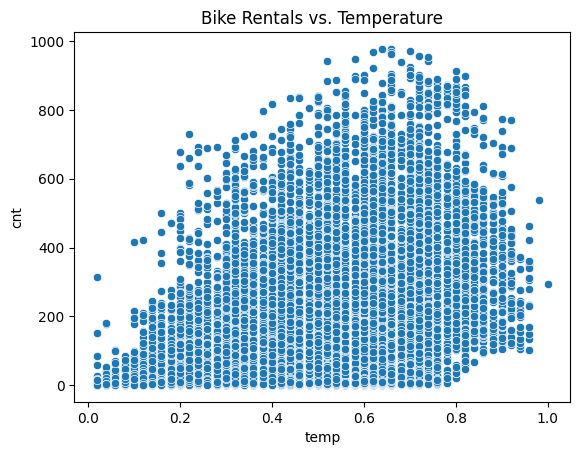

In [40]:
sns.scatterplot(x='temp', y='cnt', data=df_hour)
plt.title('Bike Rentals vs. Temperature')
plt.show()

Terdapat korelasi positif antara temperatur dan jumlah penyewa, walaupun tidak signifikan. Dengan naiknya tempereatur, jumlah penyewa juga akan naik.

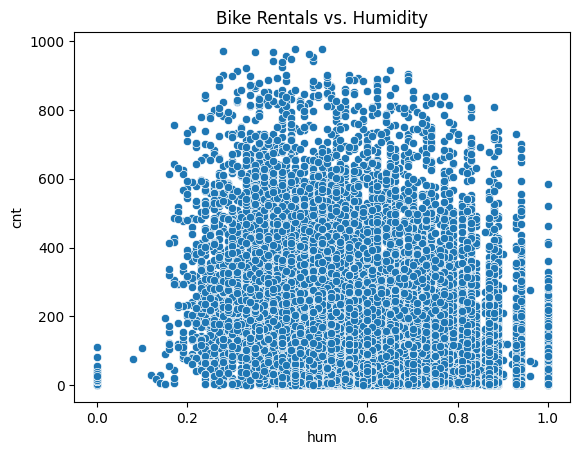

In [41]:
sns.scatterplot(x='hum', y='cnt', data=df_hour)
plt.title('Bike Rentals vs. Humidity')
plt.show()

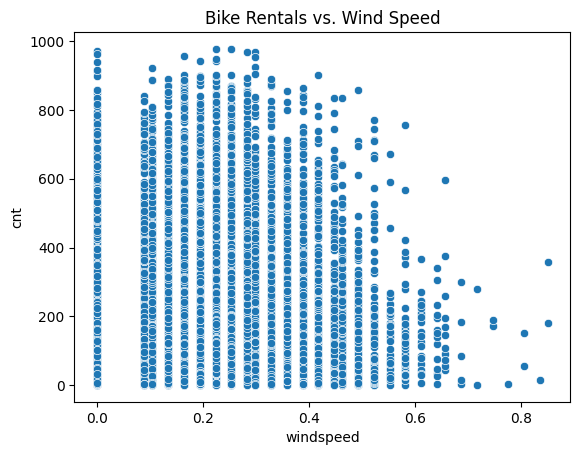

In [42]:
sns.scatterplot(x='windspeed', y='cnt', data=df_hour)
plt.title('Bike Rentals vs. Wind Speed')
plt.show()

Kelembapan dan kecepatan angin yang tinggi akan berdampak negatif terhadap jumlah penyewa.

### Pertanyaan 2: Bagaimana event dan hari libur memengaruhi penyewaan sepeda?

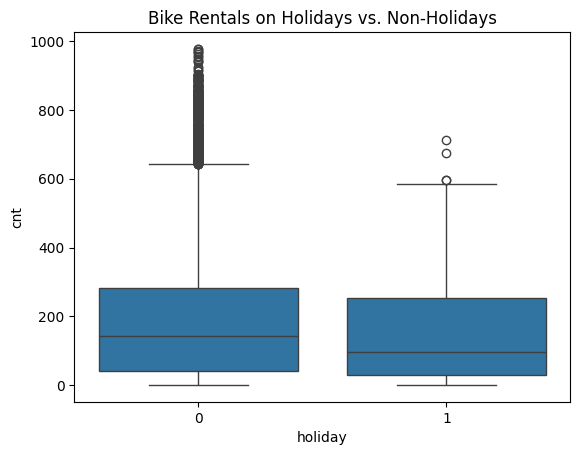

In [43]:
sns.boxplot(x='holiday', y='cnt', data=df_hour)
plt.title('Bike Rentals on Holidays vs. Non-Holidays')
plt.show()

Penyewaan akan terlihat lebih sepi saat holidays daripada saat hari biasa.
Graph menunjukan jumlah penyewa menurun saat liburan.

**Insight:**
- Berdasarkan scatter plot antara suhu dan jumlah penyewa sepeda. Ketika suhu meningkat, jumlah penyewa sepeda juga akan cenderung meningkat. ini menunjukan bahwa suhu yang lebih hangat akan mendorong lebih banyak orang untuk menyewa.
- Berdasarkan boxplot pembanding jumlah penyewaan sepeda dan kondisi cuaca, cuaca buruk (seperti hujan deras atau salju) sangat mengurangi penyewaan sepeda. Cuaca cerah dan sedikit berawan mendukung lebih banyak penyewaan, sementara cuaca ekstrem (kondisi cuaca 3 dan 4) menyebabkan penurunan drastis jumlah penyewaan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
 - Musim yang lebih hangat dan cuaca yang lebih cerah akan meningkatkan jumlah penyewa, sedangkan musim yang lebih dingin dan cuaca yang buruk akan mengurangi jumlah penyewa.
 - Temperatur yang tinggi akan menambah jumlah penyewa, sedangkan kelembapan dan kecepatan angin yang tinggi memiliki pengaruh yang berlawanan.

- Conclution pertanyaan 2
 - Jumlah penyewa lebih sedikit saat liburan atau event besar daripada saat hari biasa.
 - Cuaca ekstrim juga bisa berdampak negatif terhadap jumlah penyewa sepeda.